# FORD GO BIKE SHARE DATA STATION AND DOCKS

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import csv
import dateutil.parser
import json
import calendar
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import requests
#from urllib2 import Request, urlopen
from pandas.io.json import json_normalize
from pprint import pprint
from patsy import dmatrices


In [2]:
import imblearn

In [3]:
r= requests.get('https://gbfs.fordgobike.com/gbfs/en/station_information.json')

r.status_code

200

In [4]:
api_json = r.json()
station_dock_data=json_normalize(api_json['data']["stations"])

In [5]:
station_dock_data.columns

Index(['capacity', 'eightd_has_key_dispenser', 'eightd_station_services',
       'external_id', 'has_kiosk', 'lat', 'lon', 'name', 'region_id',
       'rental_methods', 'rental_url', 'short_name', 'station_id'],
      dtype='object')

In [6]:
station_dock_data[station_dock_data['region_id']==3.0]

,capacity,eightd_has_key_dispenser,eightd_station_services,external_id,has_kiosk,lat,lon,name,region_id,rental_methods,rental_url,short_name,station_id
0,27,False,[{'id': '6d9eb7b8-a412-407a-b424-5fa8c4ae96ba'...,83b33e8d-bf8c-4a2a-8ee3-942834af27b4,True,37.776435,-122.426244,Laguna St at Hayes St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-J21,74
1,35,False,NaN,1b13a386-c5f4-42cc-bc3b-ded95982e090,True,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-G27,3
2,35,False,NaN,a00d04e6-0159-466a-b3ab-23f9550f418c,True,37.785881,-122.408915,Cyril Magnin St at Ellis St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-G26,4
3,35,False,NaN,a1e0b4b2-2c5c-4201-a78c-9e8a2152ab4e,True,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-H26,5
4,23,False,NaN,23a2bad4-3ea1-4545-87eb-acbee3efccfc,True,37.804770,-122.403234,The Embarcadero at Sansome St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-A27,6
6,23,False,NaN,7c7ac914-40e5-426d-b9c4-f12b1a556be8,True,37.799953,-122.398525,The Embarcadero at Vallejo St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-C28-1,8
7,19,False,NaN,75f6691a-df0a-4d7a-8b35-e5ffe33add4f,True,37.798572,-122.400869,Broadway at Battery St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-C28-2,9
8,31,False,NaN,e5b0aca4-2ce6-49f8-82e8-8eed6e004147,True,37.795393,-122.404770,Washington St at Kearny St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-D27,10
9,35,False,NaN,faad71bc-21e3-4ce1-8b84-63f782a91d1b,True,37.797280,-122.398436,Davis St at Jackson St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-D28,11
10,19,False,NaN,e82e7160-d8fb-452b-8f27-c0f75926d080,True,37.794231,-122.402923,Commercial St at Montgomery St,3.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,SF-E27,13


In [7]:
station_dock_data[station_dock_data['region_id']==12.0]

,capacity,eightd_has_key_dispenser,eightd_station_services,external_id,has_kiosk,lat,lon,name,region_id,rental_methods,rental_url,short_name,station_id
5,35,False,NaN,9e3efff1-3d42-46fd-8206-4021277ba6c2,True,37.804562,-122.271738,Frank H Ogawa Plaza,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-L5,7
15,11,False,NaN,790da352-5aaa-4bb9-8453-e8ec2f78c038,True,37.850222,-122.260172,Telegraph Ave at Alcatraz Ave,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-A2,18
39,15,False,NaN,6064907e-3871-4b2c-829b-d01406cee6fb,True,37.790140,-122.242373,San Antonio Park,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-L12,46
133,19,False,NaN,c3f56bed-65e3-425b-999e-82b3a4f73aeb,True,37.833279,-122.263490,Shattuck Ave at Telegraph Ave,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-E4,158
134,19,False,NaN,92045ce2-112c-4cd9-ae42-39aac4f43e86,True,37.816060,-122.278244,24th St at Market St,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-J3,159
135,23,False,NaN,270425db-c369-4d4b-b8de-fae86c896a3c,True,37.805318,-122.294837,West Oakland BART Station,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-M1,160
136,27,False,NaN,09c20e68-4f8c-4723-ae8f-bac3dd927848,True,37.800516,-122.272080,Franklin St at 9th St,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-M6,162
137,27,False,NaN,ce264eb5-ebfe-4a03-8bd3-e319c32614ec,True,37.797320,-122.265320,Lake Merritt BART Station,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-M7,163
138,19,False,NaN,e9b45d4b-900e-4d9f-bb75-74dcea012859,True,37.814988,-122.274844,Isabella St at San Pablo Ave,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-J4,164
140,19,False,NaN,b4717e68-fb91-4e74-819f-4a9580a84ca5,True,37.848152,-122.252160,College Ave at Harwood Ave,12.0,"[KEY, CREDITCARD]",http://app.fordgobike.com/Z6gL/SiFlGfIOTF?stat...,OK-A4,167


In [8]:
len(station_dock_data[station_dock_data['region_id']==3.0])

144

In [9]:
# get 

In [10]:
# get station staus
r1=requests.get('https://gbfs.fordgobike.com/gbfs/fr/station_status.json')
api_json1 = r1.json()
station_status=json_normalize(api_json1['data']["stations"])

In [11]:
station_status.head()

,eightd_active_station_services,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,num_ebikes_available,station_id
0,[{'id': '6d9eb7b8-a412-407a-b424-5fa8c4ae96ba'}],False,1,1,1,1540856081,1,1,25,0,1,74
1,NaN,False,1,1,1,1540855943,30,1,4,0,0,3
2,NaN,False,1,1,1,1540855918,7,6,22,0,0,4
3,NaN,False,1,1,1,1540855896,12,0,23,0,0,5
4,NaN,False,1,1,1,1540856017,20,0,3,0,0,6


In [12]:
#yearly data
bike_data=pd.read_csv('2017-fordgobike-tripdata.csv')

In [13]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [14]:
bike_data.shape

(519700, 15)

In [15]:
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

In [16]:
def hourbinner(fulltime):
    return dateutil.parser.parse(fulltime).replace(minute=0, second=0,microsecond=0)
    
# print dateutil.parser.parse('7/31/2014 23:58').replace(minute=0, second=0)

In [17]:
hourbinner('2017-12-31 16:57:39.6540').replace(minute=0, second=0,microsecond=0)

datetime.datetime(2017, 12, 31, 16, 0)

In [18]:
bike_data.start_time = bike_data.start_time.apply(lambda x: hourbinner(x))

In [19]:
min(bike_data.start_time)

Timestamp('2017-06-28 09:00:00')

In [20]:
#filter the stations with data atleast from july to dec 2017
bike_fil=bike_data[bike_data['start_time'].groupby(bike_data['start_station_id']).transform('min')<'2017-07-11 16:00:00']

In [21]:
bike_data['start_time'].groupby(bike_data['start_station_id']).min()

start_station_id
3     2017-06-29 14:00:00
4     2017-06-28 11:00:00
5     2017-06-28 11:00:00
6     2017-06-28 10:00:00
7     2017-07-11 11:00:00
8     2017-06-28 14:00:00
9     2017-06-28 11:00:00
10    2017-06-28 10:00:00
11    2017-06-28 10:00:00
13    2017-06-28 11:00:00
14    2017-06-28 11:00:00
15    2017-06-28 09:00:00
16    2017-07-10 17:00:00
17    2017-06-28 10:00:00
18    2017-07-11 16:00:00
19    2017-06-28 16:00:00
20    2017-06-29 14:00:00
21    2017-06-28 09:00:00
22    2017-06-28 13:00:00
23    2017-06-28 09:00:00
24    2017-06-28 17:00:00
25    2017-06-28 09:00:00
26    2017-06-28 10:00:00
27    2017-08-10 16:00:00
28    2017-06-28 10:00:00
29    2017-08-03 18:00:00
30    2017-06-28 16:00:00
31    2017-08-10 19:00:00
33    2017-07-14 19:00:00
34    2017-07-19 06:00:00
              ...        
293   2017-12-22 11:00:00
294   2017-12-20 20:00:00
295   2017-09-20 16:00:00
296   2017-09-15 17:00:00
297   2017-09-17 09:00:00
299   2017-11-11 14:00:00
300   2017-09-27 12:0

In [22]:
bike_data.groupby(['start_station_id'])['start_time'].min()<'2017-07-11 16:00:00'

start_station_id
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
13      True
14      True
15      True
16      True
17      True
18     False
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27     False
28      True
29     False
30      True
31     False
33     False
34     False
       ...  
293    False
294    False
295    False
296    False
297    False
299    False
300    False
301    False
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
316    False
317    False
318    False
321     True
323     True
324     True
327    False
337    False
338    False
339    False
340    False
Name: start_time, Length: 272, dtype: bool

In [23]:
bike_data[bike_data['start_station_id'].groupby(bike_data['start_station_id']).transform('size')>1000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:00:00,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:00:00,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:00:00,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:00:00,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:00:00,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:00:00,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
7,4334,2017-12-31 23:00:00,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:00:00,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:00:00,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN
10,3292,2017-12-31 23:00:00,2018-01-01 00:41:24.6050,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,22,Howard St at Beale St,37.789756,-122.394643,3058,Customer,NaN,NaN


In [24]:
bike_filc=bike_fil.copy(deep=True)

In [25]:
#bin end_time
bike_filc.end_time = bike_data.end_time.apply(lambda x: hourbinner(x))


In [26]:
bike_filc['duration_min']=bike_fil['duration_sec']/60

In [27]:
bike_filc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min
5,9226,2017-12-31 22:00:00,2018-01-01 01:00:00,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,153.766667
8,4150,2017-12-31 23:00:00,2018-01-01 00:00:00,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN,69.166667
9,4238,2017-12-31 23:00:00,2018-01-01 00:00:00,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN,70.633333
12,2183,2017-12-31 23:00:00,2018-01-01 00:00:00,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,36.383333
13,2170,2017-12-31 23:00:00,2018-01-01 00:00:00,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990.0,Male,36.166667


In [28]:
#filtered no of stations
len(bike_filc.start_station_name.unique())

62

In [29]:
start_station_time=bike_filc.groupby(['start_station_name','start_time']).size()

In [30]:
start_station_time

start_station_name          start_time         
10th St at Fallon St        2017-07-11 12:00:00    1
                            2017-07-11 23:00:00    1
                            2017-07-12 10:00:00    1
                            2017-07-12 14:00:00    1
                            2017-07-12 15:00:00    1
                            2017-07-12 17:00:00    1
                            2017-07-12 19:00:00    1
                            2017-07-12 23:00:00    1
                            2017-07-13 11:00:00    2
                            2017-07-13 13:00:00    2
                            2017-07-13 15:00:00    2
                            2017-07-13 16:00:00    1
                            2017-07-13 19:00:00    2
                            2017-07-13 21:00:00    1
                            2017-07-14 06:00:00    1
                            2017-07-14 12:00:00    1
                            2017-07-14 14:00:00    1
                            2017-07-14 17:00:00    

In [31]:
#unstack multi index and pivot by start time for every sattion 
st=start_station_time.unstack(level=0)

In [32]:
st

start_station_name,10th St at Fallon St,12th St at 4th Ave,19th Street BART Station,1st St at Folsom St,24th St at Market St,2nd St at Folsom St,2nd St at S Park St,2nd St at Townsend St - Coming Soon,3rd St at Townsend St,5th St at Howard St,...,Telegraph Ave at 23rd St,Telegraph Ave at Ashby Ave,The Embarcadero at Bryant St,The Embarcadero at Sansome St,The Embarcadero at Steuart St,The Embarcadero at Vallejo St,Townsend St at 7th St,Union Square (Powell St at Post St),Victoria Manalo Draves Park,Washington St at Kearny St
start_time,,,,,,,,,,,,,,,,,,,,,
2017-06-28 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2017-06-28 10:00:00,NaN,NaN,NaN,1.0,NaN,NaN,2.0,2.0,2.0,1.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0
2017-06-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,1.0,NaN,NaN,NaN
2017-06-28 12:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,3.0,NaN,6.0,NaN,2.0,NaN,NaN,NaN
2017-06-28 13:00:00,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2.0,...,NaN,NaN,2.0,4.0,2.0,NaN,2.0,NaN,1.0,NaN
2017-06-28 14:00:00,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,2.0,2.0,1.0,NaN,1.0,3.0,NaN
2017-06-28 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.0,NaN,...,NaN,NaN,3.0,6.0,1.0,5.0,2.0,1.0,NaN,NaN
2017-06-28 16:00:00,NaN,NaN,NaN,1.0,NaN,4.0,3.0,7.0,9.0,NaN,...,NaN,NaN,2.0,4.0,3.0,4.0,5.0,NaN,NaN,NaN
2017-06-28 17:00:00,NaN,NaN,NaN,NaN,NaN,1.0,5.0,8.0,4.0,4.0,...,NaN,NaN,3.0,9.0,5.0,2.0,9.0,2.0,NaN,1.0


In [33]:
#get  hourly index  for date range 
index=pd.date_range('2017-06-28', '2017-12-31', freq='H')

In [34]:
# reset dt index of st and fill na values to 0
st=st.reindex(index,fill_value=0)

In [35]:
st.head()

start_station_name,10th St at Fallon St,12th St at 4th Ave,19th Street BART Station,1st St at Folsom St,24th St at Market St,2nd St at Folsom St,2nd St at S Park St,2nd St at Townsend St - Coming Soon,3rd St at Townsend St,5th St at Howard St,...,Telegraph Ave at 23rd St,Telegraph Ave at Ashby Ave,The Embarcadero at Bryant St,The Embarcadero at Sansome St,The Embarcadero at Steuart St,The Embarcadero at Vallejo St,Townsend St at 7th St,Union Square (Powell St at Post St),Victoria Manalo Draves Park,Washington St at Kearny St
2017-06-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-28 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-28 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-28 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-28 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
st.isna().sum()


start_station_name
10th St at Fallon St                                               3238
12th St at 4th Ave                                                 3507
19th Street BART Station                                           2310
1st St at Folsom St                                                2945
24th St at Market St                                               3784
2nd St at Folsom St                                                2396
2nd St at S Park St                                                2285
2nd St at Townsend St - Coming Soon                                2452
3rd St at Townsend St                                              2031
5th St at Howard St                                                2343
5th at Folsom                                                      2512
Berry St at 4th St                                                 1606
Broadway at 30th St                                                3292
Broadway at Battery St                       

In [37]:
st=st.fillna(0)

In [38]:
#covet to multiindex(groupby start sattion name and start time)
st=st.stack()

In [39]:
st.unique

<bound method Series.unique of             start_station_name                                             
2017-06-28  10th St at Fallon St                                               0.0
            12th St at 4th Ave                                                 0.0
            19th Street BART Station                                           0.0
            1st St at Folsom St                                                0.0
            24th St at Market St                                               0.0
            2nd St at Folsom St                                                0.0
            2nd St at S Park St                                                0.0
            2nd St at Townsend St - Coming Soon                                0.0
            3rd St at Townsend St                                              0.0
            5th St at Howard St                                                0.0
            5th at Folsom                                      

In [40]:
#swap indexes
st=st.swaplevel(0,1)

In [41]:
#orderby dt and stack by station and hour
st=st.sort_index()

In [42]:
st.unique()

array([ 0.,  1.,  2.,  3.,  5.,  4.,  7.,  6., 10., 14., 11.,  8., 12.,
        9., 13., 15., 18., 17., 16., 20., 19., 24., 21., 30., 25., 22.,
       27., 23., 28., 26., 32., 31., 29., 34., 39., 38., 35., 33., 40.,
       36., 41., 37., 44., 43., 45.])

In [43]:
end_station_time=bike_filc.groupby(['end_station_name','end_time']).size()

In [44]:
et=end_station_time.unstack(level=0)

In [45]:
#get  hourly index  for date range 
index1=pd.date_range('2017-06-28', '2018-01-01', freq='H')

In [46]:
et=et.reindex(index1,fill_value=0)

In [47]:
et.isna().sum()

end_station_name
10th Ave at E 15th St                                    4115
10th St at Fallon St                                     3704
11th St at Bryant St                                     3587
11th St at Natoma St                                     3566
12th St at 4th Ave                                       3756
12th St at 6th Ave                                       4124
13th St at Franklin St                                   4203
14th St at Filbert St                                    4172
14th St at Mandela Pkwy                                  4067
14th St at Mission St                                    3583
16th St Mission BART                                     4155
16th St Mission BART Station 2                           4115
16th St at Prosper St                                    4084
17th & Folsom Street Park (17th St at Folsom St)         3950
17th St at Dolores St                                    3972
17th St at Valencia St                               

In [48]:
et=et.fillna(0)

In [49]:
et=et.stack()

In [50]:
et.unique()

array([ 0.,  2.,  1.,  3.,  6.,  4.,  5., 10.,  8.,  7., 15., 27., 13.,
        9., 14., 11., 19., 33., 20., 22., 12., 17., 16., 24., 21., 25.,
       39., 32., 18., 26., 35., 30., 36., 28., 31., 23., 43., 40., 37.,
       29., 41., 42., 52., 34., 46., 44., 49., 45., 38., 66., 48., 54.,
       53., 73., 55., 59., 47., 63., 58.])

In [51]:
et=et.swaplevel(0,1)

In [52]:
et=et.sort_index()

In [53]:
et_df=et.reset_index()

In [54]:
et_df[0].unique()

array([ 0.,  1.,  2.,  3.,  5.,  4.,  6.,  7.,  9.,  8., 11., 10., 12.,
       13., 14., 15., 16., 18., 19., 17., 20., 21., 22., 24., 27., 33.,
       25., 39., 26., 35., 28., 31., 23., 43., 40., 37., 29., 36., 41.,
       30., 52., 42., 34., 46., 32., 44., 49., 45., 38., 66., 48., 54.,
       53., 73., 55., 59., 47., 63., 58.])

In [55]:
st_df=st.reset_index()

In [56]:
tot=st_df.merge(et_df,how='inner',left_on=['start_station_name','level_1'],right_on=['end_station_name','level_1'])

In [57]:
tot['0_x'].unique()

array([ 0.,  1.,  2.,  3.,  5.,  4.,  7.,  6., 10., 14., 11.,  8., 12.,
        9., 13., 15., 18., 17., 16., 20., 19., 24., 21., 30., 25., 22.,
       27., 23., 28., 26., 32., 31., 29., 34., 39., 38., 35., 33., 40.,
       36., 41., 37., 44., 43., 45.])

In [58]:
tot.drop(columns=['end_station_name'],inplace=True)

In [59]:
tot.rename(columns={'0_x': 'outflow', '0_y': 'inflow','level_1':'time'}, inplace=True)

In [60]:
tot.head(5)

,start_station_name,time,outflow,inflow
0,10th St at Fallon St,2017-06-28 00:00:00,0.0,0.0
1,10th St at Fallon St,2017-06-28 01:00:00,0.0,0.0
2,10th St at Fallon St,2017-06-28 02:00:00,0.0,0.0
3,10th St at Fallon St,2017-06-28 03:00:00,0.0,0.0
4,10th St at Fallon St,2017-06-28 04:00:00,0.0,0.0


In [61]:
tot['flow_diff']=tot['inflow']-tot['outflow']

In [62]:
tot.flow_diff.value_counts()

 0.0     168952
-1.0      33812
 1.0      21664
-2.0      15153
 2.0       8427
-3.0       7304
-4.0       4101
 3.0       3694
-5.0       2385
 4.0       1956
-6.0       1507
 5.0       1201
-7.0        991
-8.0        713
 6.0        712
-9.0        518
 7.0        498
-10.0       376
 8.0        332
-11.0       259
 9.0        217
-12.0       195
 10.0       162
-13.0       156
 11.0       124
-14.0       110
-15.0       102
 12.0        85
-16.0        83
 14.0        69
          ...  
-29.0         9
-30.0         9
-32.0         9
 35.0         8
 38.0         7
 36.0         6
 34.0         6
-37.0         5
-34.0         5
-33.0         5
 40.0         4
-36.0         4
-31.0         4
 41.0         3
 37.0         3
 49.0         2
 46.0         2
 45.0         2
-35.0         2
-39.0         2
 47.0         1
 56.0         1
 52.0         1
-41.0         1
 48.0         1
 64.0         1
 50.0         1
 43.0         1
 44.0         1
-38.0         1
Name: flow_diff, Length:

In [63]:
tot.head()


,start_station_name,time,outflow,inflow,flow_diff
0,10th St at Fallon St,2017-06-28 00:00:00,0.0,0.0,0.0
1,10th St at Fallon St,2017-06-28 01:00:00,0.0,0.0,0.0
2,10th St at Fallon St,2017-06-28 02:00:00,0.0,0.0,0.0
3,10th St at Fallon St,2017-06-28 03:00:00,0.0,0.0,0.0
4,10th St at Fallon St,2017-06-28 04:00:00,0.0,0.0,0.0


In [64]:
tot.shape

(276830, 5)

In [65]:
A=set(tot.start_station_name.unique())

In [66]:
stat_info=station_dock_data[['capacity','station_id','name','lat','lon','region_id']]

In [67]:
stat_info.head()

,capacity,station_id,name,lat,lon,region_id
0,27,74,Laguna St at Hayes St,37.776435,-122.426244,3.0
1,35,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0
2,35,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3.0
3,35,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3.0
4,23,6,The Embarcadero at Sansome St,37.804770,-122.403234,3.0


In [68]:
B=set(stat_info.name.unique())

In [69]:
C=(A.intersection(B))

In [70]:
A-C

{'12th St at 4th Ave',
 '2nd St at S Park St',
 '2nd St at Townsend St - Coming Soon',
 '5th St at Howard St',
 '5th at Folsom',
 'Jackson St at 14th St'}

In [71]:
def func(x):
    if x=='2nd St at Townsend St - Coming Soon':
        return '2nd St at Townsend St'
    elif x=='5th at Folsom':
        return '5th St at Folsom'
    elif x=='Jackson St at 14th St':
        return 'Jackson Playground'
    else:
        return x
    
    

In [72]:
tot['start_station_name']=tot['start_station_name'].apply(func)

In [73]:
sorted(list(B))

['10th Ave at E 15th St',
 '10th St at Fallon St',
 '10th St at University Ave',
 '11th St at Bryant St',
 '11th St at Natoma St',
 '13th St at Franklin St',
 '14th St at Filbert St',
 '14th St at Mandela Pkwy',
 '14th St at Mission St',
 '16th St Mission BART',
 '16th St Mission BART Station 2',
 '16th St at Prosper St',
 '17th & Folsom Street Park (17th St at Folsom St)',
 '17th St at Dolores St',
 '17th St at Valencia St',
 '18th St at Noe St',
 '19th St at Florida St',
 '19th St at Mission St',
 '19th Street BART Station',
 '1st St at Folsom St',
 '20th St at Bryant St',
 '20th St at Dolores St',
 '21st Ave at International Blvd',
 '22nd St Caltrain Station',
 '23rd Ave at Foothill Blvd',
 '23rd St at San Bruno Ave',
 '23rd St at Tennessee St',
 '24th St at Chattanooga St',
 '24th St at Market St',
 '26th Ave at International Blvd',
 '27th St at MLK Jr Way',
 '29th St at Church St',
 '29th St at Tiffany Ave',
 '2nd Ave at E 18th St',
 '2nd St at Folsom St',
 '2nd St at Julian St',


In [74]:
#merge on capacity and sattion id
merged=tot.merge(stat_info,how='left',left_on='start_station_name',right_on='name')

In [75]:
merged.dropna(inplace=True)

In [76]:
merged.drop(columns=['name'],axis=1,inplace=True)

In [77]:
merged.head()

,start_station_name,time,outflow,inflow,flow_diff,capacity,station_id,lat,lon,region_id
0,10th St at Fallon St,2017-06-28 00:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0
1,10th St at Fallon St,2017-06-28 01:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0
2,10th St at Fallon St,2017-06-28 02:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0
3,10th St at Fallon St,2017-06-28 03:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0
4,10th St at Fallon St,2017-06-28 04:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0


In [78]:
merged.region_id.value_counts()

3.0     183065
12.0     66975
14.0      8930
13.0      4465
Name: region_id, dtype: int64

In [79]:

#adding a flux column that categorizes both excessive inflow and outflow based on a threshold percentage 
#calculated on flowdiff/totalDocks for each station. (Done for every hour, as our dataframe is)
#normal
merged['flux'] = 0
#caution imbalance surplus of bikes,excessive inflow
merged.loc[(merged['flow_diff'] > 0) & (merged.flow_diff.abs() > (merged.capacity * 0.15)), 'flux'] = 1
#caution imbalance shortage of bikes, excessive outflow
merged.loc[(merged['flow_diff'] < 0) & (merged.flow_diff.abs() > (merged.capacity * 0.15)), 'flux'] = 2


In [80]:
#highly imbalanced
merged.flux.value_counts()

0    249331
2      9275
1      4829
Name: flux, dtype: int64

In [81]:
merged.capacity.unique()

array([23., 35., 19., 43., 39., 31., 27., 38., 15.])

In [82]:
#all stations where there is capacity shortage/surplus
merged.loc[abs(merged.flow_diff)>merged.capacity,:].start_station_name.unique()

array(['San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)'],
      dtype=object)

In [83]:
#create a day of week column
merged['day_wk'] = merged['time'].apply(lambda x: calendar.day_name[x.weekday()])

In [84]:

x=merged.time.iloc[0]
calendar.day_name[x.weekday()]

'Wednesday'

In [85]:
#create an hour column
merged['hour'] =merged['time'].apply(lambda x: x.hour)

In [86]:
merged.head()

,start_station_name,time,outflow,inflow,flow_diff,capacity,station_id,lat,lon,region_id,flux,day_wk,hour
0,10th St at Fallon St,2017-06-28 00:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0,0,Wednesday,0
1,10th St at Fallon St,2017-06-28 01:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0,0,Wednesday,1
2,10th St at Fallon St,2017-06-28 02:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0,0,Wednesday,2
3,10th St at Fallon St,2017-06-28 03:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0,0,Wednesday,3
4,10th St at Fallon St,2017-06-28 04:00:00,0.0,0.0,0.0,23.0,201,37.797673,-122.262997,12.0,0,Wednesday,4


In [87]:
#only considering SF stations
df_sf=merged[merged['region_id']==3.0]

In [88]:
df_sf.flux.value_counts()

0    169772
2      8541
1      4752
Name: flux, dtype: int64

In [89]:
y, X = dmatrices('flux ~ start_station_name + day_wk + hour', data=df_sf, return_type='dataframe')

In [90]:
#startified train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

In [91]:
type(y_train)

pandas.core.frame.DataFrame

### visualization

In [92]:
# chart showing flow diff by hour
df_hr= df_sf.groupby(['start_station_name', 'hour']).flow_diff.sum()

In [93]:
df_h=df_hr.reset_index()

In [94]:

df_h1 = df_h.pivot('start_station_name', 'hour', "flow_diff")
df_h1.index.name = None
df_h1.columns.name = None

In [95]:
df_h1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1st St at Folsom St,4.0,5.0,0.0,-4.0,3.0,-31.0,-185.0,-108.0,-125.0,-156.0,...,22.0,55.0,26.0,-62.0,44.0,71.0,64.0,56.0,33.0,9.0
2nd St at Folsom St,-2.0,-1.0,-3.0,0.0,-48.0,-12.0,52.0,-39.0,300.0,452.0,...,-138.0,-203.0,-455.0,-897.0,-535.0,-195.0,-111.0,-34.0,-24.0,-14.0
2nd St at Townsend St,-2.0,-5.0,3.0,0.0,0.0,-3.0,62.0,81.0,696.0,721.0,...,-83.0,-334.0,-700.0,-785.0,13.0,117.0,44.0,-11.0,-96.0,-18.0
3rd St at Townsend St,-29.0,-4.0,3.0,2.0,1.0,9.0,141.0,75.0,258.0,-242.0,...,-100.0,-165.0,-379.0,-543.0,-347.0,-19.0,-69.0,-81.0,-79.0,-49.0
5th St at Folsom,-12.0,-6.0,-11.0,-2.0,-6.0,-16.0,-60.0,-180.0,-39.0,-282.0,...,-57.0,-40.0,-55.0,-171.0,93.0,12.0,-28.0,-22.0,-7.0,-6.0
Berry St at 4th St,20.0,0.0,9.0,-1.0,-9.0,-17.0,-180.0,-236.0,-517.0,-238.0,...,-160.0,-114.0,-208.0,-817.0,-248.0,-34.0,-11.0,24.0,-35.0,3.0
Broadway at Battery St,4.0,3.0,-1.0,2.0,0.0,-6.0,5.0,4.0,387.0,640.0,...,-1.0,-97.0,-358.0,-900.0,-392.0,-49.0,-19.0,-15.0,-14.0,-11.0
Broadway at Kearny,3.0,-7.0,-14.0,-1.0,1.0,-4.0,-198.0,-180.0,-525.0,-258.0,...,-53.0,-16.0,3.0,6.0,26.0,31.0,-4.0,-35.0,-20.0,-12.0
Bryant St at 6th St,-4.0,2.0,-1.0,0.0,0.0,-1.0,17.0,23.0,109.0,2.0,...,-24.0,-32.0,-92.0,-79.0,-61.0,-26.0,-10.0,-2.0,15.0,11.0
Civic Center/UN Plaza BART Station (Market St at McAllister St),-34.0,-10.0,-3.0,-2.0,-15.0,-78.0,-40.0,-191.0,-346.0,-179.0,...,-176.0,-115.0,-3.0,19.0,-96.0,-69.0,-87.0,-64.0,-35.0,-30.0


Text(0.5, 69.0, 'Hour')

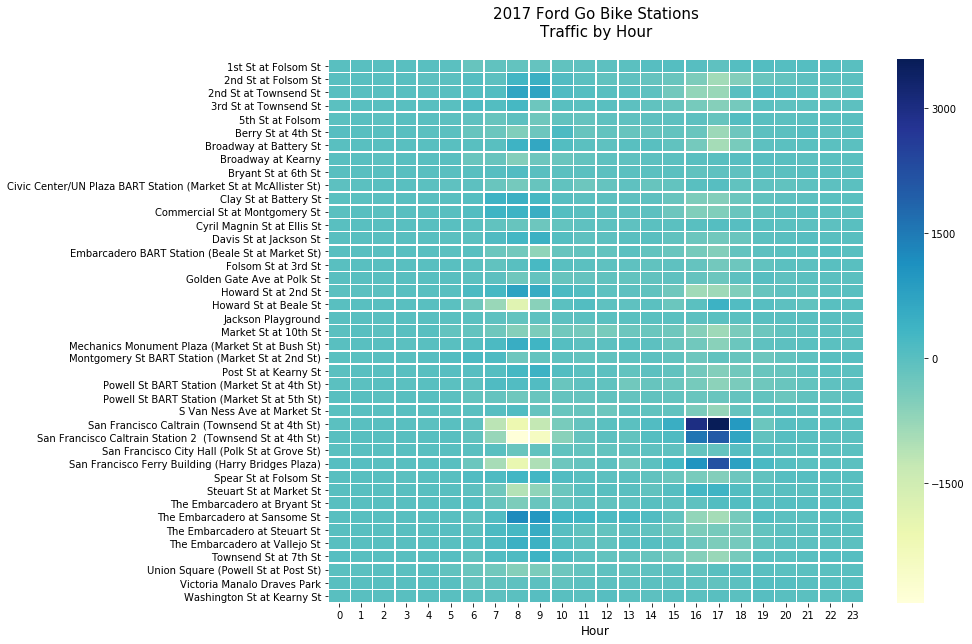

In [268]:
plt.figure(figsize=(12,10))
ax = plt.subplot(111)
sns.heatmap(df_h1, linewidths=0.5,  cmap="YlGnBu")
ax.tick_params(labelbottom=True)
plt.title("2017 Ford Go Bike Stations\nTraffic by Hour\n", y= 1.022, fontsize = 15)
#ax.text(10, 315, 'Inflow', backgroundcolor = 'salmon', color = 'White', fontsize = 20)
#ax.text(12.5, 315, 'Outflow', backgroundcolor = 'lightblue', color = 'White', fontsize = 20)
plt.savefig("Heatmap.png", bbox_inches='tight')
plt.xlabel('Hour',fontsize = 12)

### BASIC MODEL

In [97]:
#Logisitic Model-only binary classification /one vs rest 
logmodel = LogisticRegression().fit(X_train, np.array(y_train).ravel())
print(logmodel.score(X_test, np.array(y_test).ravel()))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9273930998317566


In [98]:
#decison tree
Treemodel = DecisionTreeClassifier().fit(X_train, y_train)

print(Treemodel.score(X_test, y_test))

0.941835820569406


## Import Weather Data

In [99]:

#Reading in the weather data to append to our bike dataframe.

weather_df = pd.read_csv("weather.csv", sep = ',')

In [100]:
weather_df.head()

,Unnamed: 0,temperature,summary,windSpeed,visibility,apparentTemperature
0,2017-06-27 00:00:00-07:00,60.06,Mostly Cloudy,5.57,10.00,60.06
1,2017-06-27 01:00:00-07:00,59.50,Mostly Cloudy,5.20,10.00,59.50
2,2017-06-27 02:00:00-07:00,58.94,Overcast,5.53,10.00,58.94
3,2017-06-27 03:00:00-07:00,58.41,Overcast,5.54,9.15,58.41
4,2017-06-27 04:00:00-07:00,58.13,Overcast,5.04,10.00,58.13


In [101]:
#no null values
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 6 columns):
Unnamed: 0             4513 non-null object
temperature            4513 non-null float64
summary                4513 non-null object
windSpeed              4513 non-null float64
visibility             4513 non-null float64
apparentTemperature    4513 non-null float64
dtypes: float64(4), object(2)
memory usage: 211.6+ KB


In [102]:
weather_df = weather_df.rename(columns = {'Unnamed: 0':'hourly_time'})

In [103]:
#new hourbinner function that gets rid of the tzinfo  in datetime string
def tz_hourbinner(fulltime):
    return dateutil.parser.parse(fulltime).replace(minute=0, second=0, tzinfo=None)

In [104]:
weather_df.hourly_time = weather_df.hourly_time.apply(lambda x: tz_hourbinner(x))

In [105]:
type(df_sf.time.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
type(weather_df.hourly_time.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [107]:

#merge on capacity and sattion id
data=df_sf.merge(weather_df,how='left',left_on='time',right_on='hourly_time')


In [108]:
data.drop(columns=['hourly_time'],inplace=True)

In [109]:
data.head()

,start_station_name,time,outflow,inflow,flow_diff,capacity,station_id,lat,lon,region_id,flux,day_wk,hour,temperature,summary,windSpeed,visibility,apparentTemperature
0,1st St at Folsom St,2017-06-28 00:00:00,0.0,0.0,0.0,23.0,26,37.78729,-122.39438,3.0,0,Wednesday,0,57.15,Mostly Cloudy,5.57,10.00,57.15
1,1st St at Folsom St,2017-06-28 01:00:00,0.0,0.0,0.0,23.0,26,37.78729,-122.39438,3.0,0,Wednesday,1,56.84,Mostly Cloudy,5.45,10.00,56.84
2,1st St at Folsom St,2017-06-28 02:00:00,0.0,0.0,0.0,23.0,26,37.78729,-122.39438,3.0,0,Wednesday,2,56.42,Overcast,5.06,10.00,56.42
3,1st St at Folsom St,2017-06-28 03:00:00,0.0,0.0,0.0,23.0,26,37.78729,-122.39438,3.0,0,Wednesday,3,56.04,Mostly Cloudy,4.88,9.96,56.04
4,1st St at Folsom St,2017-06-28 04:00:00,0.0,0.0,0.0,23.0,26,37.78729,-122.39438,3.0,0,Wednesday,4,55.74,Mostly Cloudy,4.88,9.96,55.74


In [110]:
#save final data to csv
data.to_csv('bike_model_data.csv',sep=',')

### SMOTE ENN ON TRAIN DATA TO MAKE BALANCED DATASET

In [111]:
#start_station_name + dayo_wk + C(hour) + summary + temperature+visibility+winspeed

In [112]:
mod_df=data.drop(columns=['time','outflow','inflow','flow_diff','lat','lon','apparentTemperature','capacity',\
                          'station_id','region_id'])

In [113]:
mod_df.head()

,start_station_name,flux,day_wk,hour,temperature,summary,windSpeed,visibility
0,1st St at Folsom St,0,Wednesday,0,57.15,Mostly Cloudy,5.57,10.00
1,1st St at Folsom St,0,Wednesday,1,56.84,Mostly Cloudy,5.45,10.00
2,1st St at Folsom St,0,Wednesday,2,56.42,Overcast,5.06,10.00
3,1st St at Folsom St,0,Wednesday,3,56.04,Mostly Cloudy,4.88,9.96
4,1st St at Folsom St,0,Wednesday,4,55.74,Mostly Cloudy,4.88,9.96


In [114]:
mod_df.columns

Index(['start_station_name', 'flux', 'day_wk', 'hour', 'temperature',
       'summary', 'windSpeed', 'visibility'],
      dtype='object')

In [115]:
X=mod_df.loc[:,['start_station_name', 'day_wk', 'hour', 'temperature',
       'summary', 'windSpeed', 'visibility']]

In [116]:
y=mod_df.flux

In [117]:
#stratified train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [262]:
#save all  test data to csv files

X_test.to_csv('X_test.csv',sep=',')
y_test.to_csv('y_test.csv',sep=',')


In [128]:
new_df=pd.concat([X_train,y_train],axis=1)

In [129]:
new_df.head()

,start_station_name,day_wk,hour,temperature,summary,windSpeed,visibility,flux
17573,3rd St at Townsend St,Monday,22,49.23,Clear,1.29,9.86,0
101403,Montgomery St BART Station (Market St at 2nd St),Monday,6,50.91,Partly Cloudy,0.98,9.92,0
73154,Golden Gate Ave at Polk St,Wednesday,18,71.15,Partly Cloudy,6.67,10.00,0
85563,Jackson Playground,Thursday,13,74.59,Clear,2.08,10.00,0
178255,Victoria Manalo Draves Park,Friday,0,49.63,Clear,1.68,9.60,0


In [155]:
new_df.corr()

,temperature,windSpeed,visibility,flux
temperature,1.000000,0.187541,0.014747,0.084487
windSpeed,0.187541,1.000000,0.101070,0.057180
visibility,0.014747,0.101070,1.000000,-0.001043
flux,0.084487,0.057180,-0.001043,1.000000


In [134]:
new_df['hour']=new_df['hour'].astype('category')
new_df['hour'].dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=False)

### Encode categorical variables using dmatrices

In [137]:
y_tr, X_tr = dmatrices('flux ~ day_wk +hour+temperature+summary+windSpeed+visibility-1',\
                       data=new_df, return_type='dataframe')

In [263]:
X_tr.to_csv('X_train.csv',sep=',')
y_tr.to_csv('y_train.csv',sep=',')

In [174]:
pd.set_option('display.max_columns', 500)

In [175]:
X_tr.head()

,day_wk[Friday],day_wk[Monday],day_wk[Saturday],day_wk[Sunday],day_wk[Thursday],day_wk[Tuesday],day_wk[Wednesday],hour[T.1],hour[T.2],hour[T.3],hour[T.4],hour[T.5],hour[T.6],hour[T.7],hour[T.8],hour[T.9],hour[T.10],hour[T.11],hour[T.12],hour[T.13],hour[T.14],hour[T.15],hour[T.16],hour[T.17],hour[T.18],hour[T.19],hour[T.20],hour[T.21],hour[T.22],hour[T.23],summary[T.Light Rain],summary[T.Mostly Cloudy],summary[T.Overcast],summary[T.Partly Cloudy],summary[T.Rain],temperature,windSpeed,visibility
17573,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.23,1.29,9.86
101403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.91,0.98,9.92
73154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,71.15,6.67,10.00
85563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.59,2.08,10.00
178255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.63,1.68,9.60


In [259]:
X_tr.columns

Index(['day_wk[Friday]', 'day_wk[Monday]', 'day_wk[Saturday]',
       'day_wk[Sunday]', 'day_wk[Thursday]', 'day_wk[Tuesday]',
       'day_wk[Wednesday]', 'hour[T.1]', 'hour[T.2]', 'hour[T.3]', 'hour[T.4]',
       'hour[T.5]', 'hour[T.6]', 'hour[T.7]', 'hour[T.8]', 'hour[T.9]',
       'hour[T.10]', 'hour[T.11]', 'hour[T.12]', 'hour[T.13]', 'hour[T.14]',
       'hour[T.15]', 'hour[T.16]', 'hour[T.17]', 'hour[T.18]', 'hour[T.19]',
       'hour[T.20]', 'hour[T.21]', 'hour[T.22]', 'hour[T.23]',
       'summary[T.Light Rain]', 'summary[T.Mostly Cloudy]',
       'summary[T.Overcast]', 'summary[T.Partly Cloudy]', 'summary[T.Rain]',
       'temperature', 'windSpeed', 'visibility'],
      dtype='object')

In [121]:
y_train.value_counts()

0    127359
2      6406
1      3564
Name: flux, dtype: int64

In [141]:
y_tr.head()

,flux
17573,0.0
101403,0.0
73154,0.0
85563,0.0
178255,0.0


In [153]:
y_tr1=y_tr.values

### Apply smote  ENN on all classes in train data

In [139]:
from collections import Counter
from imblearn.combine import SMOTEENN

In [154]:
#make balanced data
sme = SMOTEENN(sampling_strategy='all',random_state=42)
X_res, y_res = sme.fit_resample(X_tr, y_tr1)
print('Resampled dataset shape %s' % Counter(y_res))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled dataset shape Counter({0.0: 96809, 1.0: 55711, 2.0: 47193})


In [267]:
y_res.shape

(199713,)

In [265]:
pd.DataFrame(X_res).to_csv('X_res.csv',sep=',')
pd.DataFrame(y_res).to_csv('y_res.csv',sep=',')

### Apply to model

In [182]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline

In [173]:
# use stratified k fold cv #3 fold because of multi class classificaiton
models = [('knn', KNN),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 7)
    },
  
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 150],
        'max_depth': [2,3,4,5],
        'min_samples_leaf': [3,6,9]
       
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    kfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
    grid = GridSearchCV(model(), params,n_jobs=-1, cv=kfolds.split(X_res, y_res))
    grid.fit(X_res, y_res)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid

knn: best score: 0.993776068658525
tree: best score: 0.7075353131744053
forest: best score: 0.708501699939413


In [243]:
grid.best_params_# random forest

{'max_depth': 5, 'min_samples_leaf': 9, 'n_estimators': 150}

In [261]:
grids['tree'].best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [248]:
grids['knn'].best_params_#no of neighbous is 1 may be overfitting even with cross validation and smote enn to train

{'n_neighbors': 1}

### multiclass logit

In [ ]:
#apply standard scaler


In [189]:

models = [ 
          ('logistic', LogisticRegression)]
param_choices = [{
        'C': np.logspace(-3, 9, 8),
        'penalty': ['l2']
    }
]
grids1 = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    kfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
    grid1 = GridSearchCV(model(solver='sag' ,multi_class ='multinomial'), params,n_jobs=-1, cv=kfolds.split(X_res, y_res))
    grid1.fit(X_res, y_res)
    s = f"{name}: best score: {grid1.best_score_}"
    print(s)
    grids1[name] = grid

logistic: best score: 0.6643833901648866


###  gradient boost ,Naive Bayes with radomized search cv

In [226]:
from sklearn.model_selection import RandomizedSearchCV
p_test3 = {'learning_rate':[0.1,0.01,0.001], 'n_estimators':[100,200],\
           'min_samples_split':[2,5,10], 'max_depth':[3,5,9]}
kfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
rs = RandomizedSearchCV(estimator =GradientBoostingClassifier(min_samples_leaf=3, subsample=1,\
            max_features='sqrt', random_state=42), 
            param_distributions = p_test3, scoring='accuracy', cv=kfolds.split(X_res,y_res),n_jobs=-1,iid=False)
rs.fit(X_res,y_res)
print(rs.best_params_)
print(rs.best_estimator_)

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 9, 'learning_rate': 0.1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)


In [227]:
rs.best_score_

0.981904035292275

### Support Vector Machine Classifier

In [241]:
from sklearn import svm

Cs = [0.001, 0.01, 1]
gammas = [0.001, 0.05, 1]
param_grid = {'C': Cs, 'gamma' : gammas,'kernel':['rbf','linear']}
kfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(svm.SVC(), param_grid, cv=kfolds.split(X_res,y_res),random_state=42,n_jobs=-1)
rand_search.fit(X_res,y_res)
print( rand_search.best_params_)
print( rand_search.best_score_)

KeyboardInterrupt: 

### Pickle best model(Gradient boost Classifier is the best model with an accuracy of 0.981)

In [245]:
gbc_mod=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)
gbc_mod.fit(X_res,y_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [246]:
import pickle

pickle.dump(gbc_mod, open('model_gbc.pkl', 'wb'))

In [251]:
rbc_mod=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rbc_mod.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# Feature importance

In [258]:
rbc_mod.feature_importances_#hr 9 is highly important 9am

array([1.30982928e-03, 8.32976093e-04, 7.23735000e-02, 7.19670638e-02,
       1.46454345e-03, 4.05968193e-03, 4.17819890e-03, 1.63917025e-02,
       1.96089684e-02, 1.93484868e-02, 1.90680411e-02, 1.57672697e-02,
       4.30945061e-03, 8.81719803e-03, 8.38195120e-02, 1.76114727e-01,
       2.28425189e-03, 3.55567990e-03, 3.83112100e-03, 3.64193021e-03,
       5.60673793e-03, 4.19354547e-03, 1.11140003e-01, 1.43168887e-01,
       5.52310693e-02, 1.01592601e-03, 5.84449400e-03, 1.11029710e-02,
       7.17786623e-03, 7.96771645e-03, 1.97030665e-05, 1.28744066e-03,
       1.33296915e-03, 2.72720156e-03, 3.08319682e-05, 8.99862418e-02,
       1.47053754e-02, 4.71688747e-03])

In [252]:
pickle.dump(rbc_mod, open('model_rbc.pkl', 'wb'))

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')